<a href="https://colab.research.google.com/github/2303A510F7/aiml_10F7/blob/main/aiml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# Load dataset
data = pd.read_csv('/content/column_2C_weka.csv')
print(data.columns)
print(data.head())


Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')
   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  


In [ ]:
# Separate features and target
X = data.drop(columns='class')  # Replace 'class' with the correct column name for your dataset
y = data['class']  # Replace 'class' with the correct column name for your datase

In [ ]:
# Label Encoding for the target variable (if categorical)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=48)

In [ ]:

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# ----- Linear Regression -----
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")


Linear Regression MSE: 0.192549611773982


In [ ]:
# ----- Logistic Regression -----
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log * 100}%")


Logistic Regression Accuracy: 84.67741935483872%


In [ ]:
# ----- Decision Tree Classifier -----
dt_model = DecisionTreeClassifier(random_state=48)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt * 100}%")


Decision Tree Classifier Accuracy: 80.24193548387096%


In [ ]:
# ----- Random Forest Classifier -----
rf_model = RandomForestClassifier(random_state=48)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf * 100}%")


Random Forest Classifier Accuracy: 83.46774193548387%


In [ ]:
# ----- K-Nearest Neighbors (KNN) -----
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn * 100}%")


K-Nearest Neighbors Accuracy: 80.24193548387096%


In [ ]:
# ----- Support Vector Machine (SVM) -----
svm_classifier = SVC(random_state=48)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100}%")


SVM Accuracy: 83.06451612903226%


In [ ]:
# ----- Confusion Matrix Plot -----
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{title} Confusion Matrix")
    plt.show()


Confusion Matrix for Logistic Regression


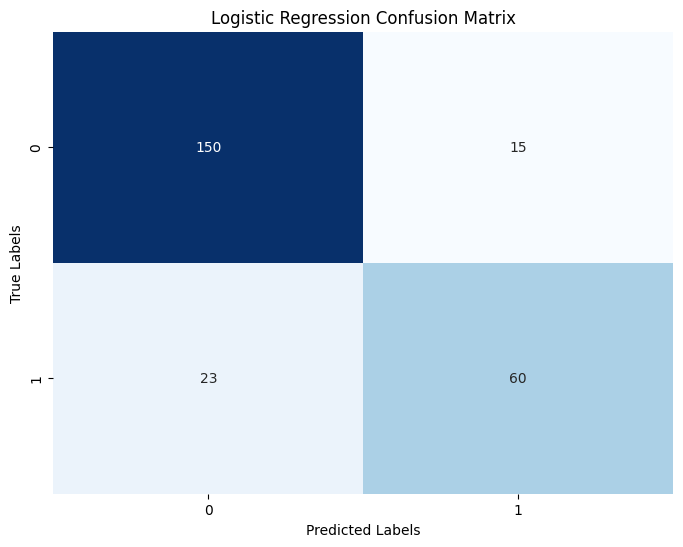

In [ ]:
# Plot confusion matrix for all models
print("Confusion Matrix for Logistic Regression")
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plot_confusion_matrix(conf_matrix_log, "Logistic Regression")


Confusion Matrix for Decision Tree


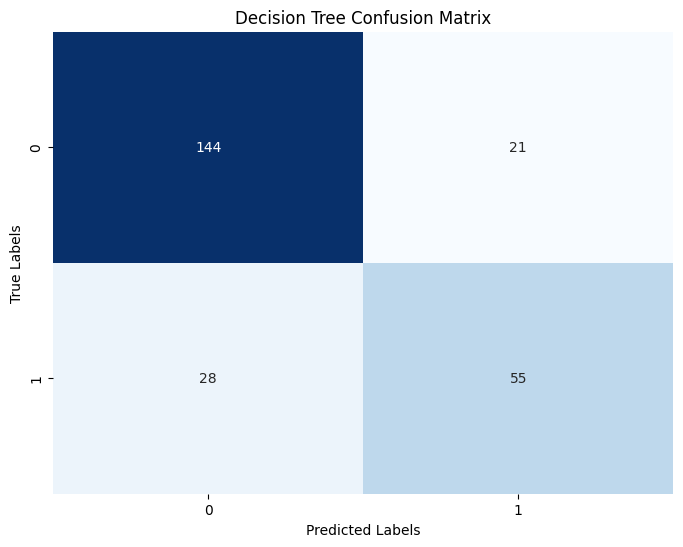

In [ ]:
print("Confusion Matrix for Decision Tree")
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(conf_matrix_dt, "Decision Tree")


Confusion Matrix for Random Forest


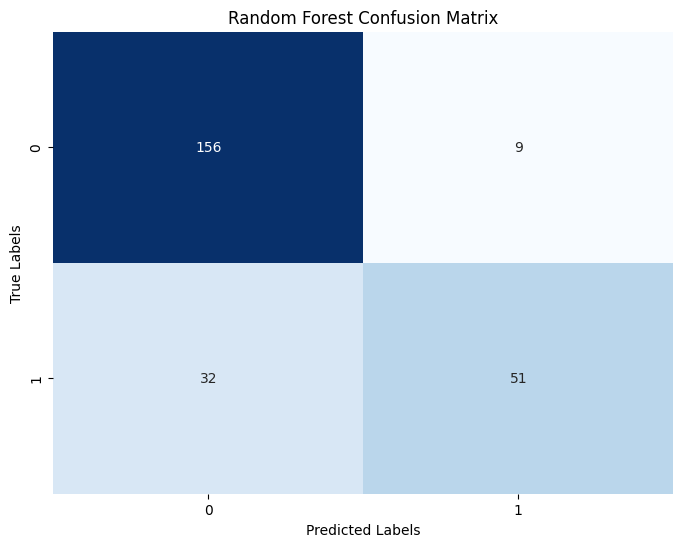

In [ ]:
print("Confusion Matrix for Random Forest")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(conf_matrix_rf, "Random Forest")


Confusion Matrix for KNN


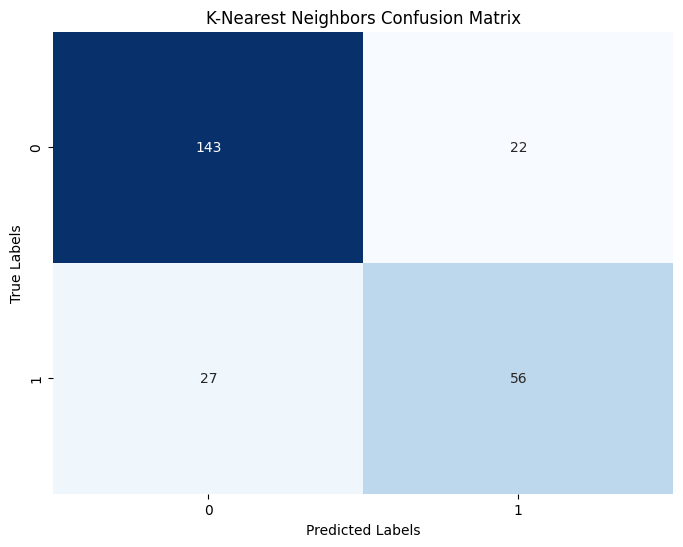

In [ ]:
print("Confusion Matrix for KNN")
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(conf_matrix_knn, "K-Nearest Neighbors")


Confusion Matrix for SVM


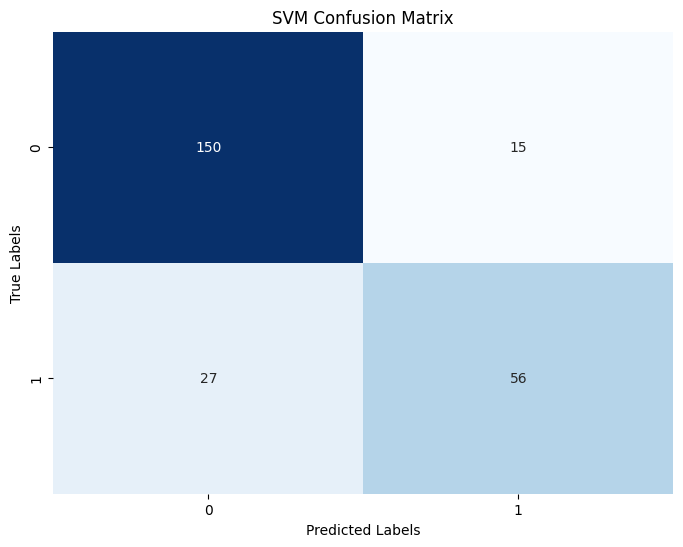

In [ ]:
print("Confusion Matrix for SVM")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(conf_matrix_svm, "SVM")

In [ ]:
# ----- Classification Reports -----
print("\nClassification Report for Logistic Regression")
print(classification_report(y_test, y_pred_log))



Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       165
           1       0.80      0.72      0.76        83

    accuracy                           0.85       248
   macro avg       0.83      0.82      0.82       248
weighted avg       0.84      0.85      0.84       248



In [ ]:
print("\nClassification Report for Decision Tree")
print(classification_report(y_test, y_pred_dt))



Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       165
           1       0.72      0.66      0.69        83

    accuracy                           0.80       248
   macro avg       0.78      0.77      0.77       248
weighted avg       0.80      0.80      0.80       248



In [ ]:
print("\nClassification Report for Random Forest")
print(classification_report(y_test, y_pred_rf))



Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       165
           1       0.85      0.61      0.71        83

    accuracy                           0.83       248
   macro avg       0.84      0.78      0.80       248
weighted avg       0.84      0.83      0.83       248



In [ ]:
print("\nClassification Report for K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))



Classification Report for K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       165
           1       0.72      0.67      0.70        83

    accuracy                           0.80       248
   macro avg       0.78      0.77      0.77       248
weighted avg       0.80      0.80      0.80       248



In [ ]:
print("\nClassification Report for SVM")
print(classification_report(y_test, y_pred_svm))


Classification Report for SVM
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       165
           1       0.79      0.67      0.73        83

    accuracy                           0.83       248
   macro avg       0.82      0.79      0.80       248
weighted avg       0.83      0.83      0.83       248

